# importing required libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df =pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# checking the shape
df.shape

(32560, 15)

data has 32560 rows and 15 columns

this is a classification problem 

In [4]:
# checking data types
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

data has 6 columns of int data type and 9 columns of object data types


In [5]:
# chechking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


there is no null values present in our dataset

In [6]:
# checking Null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

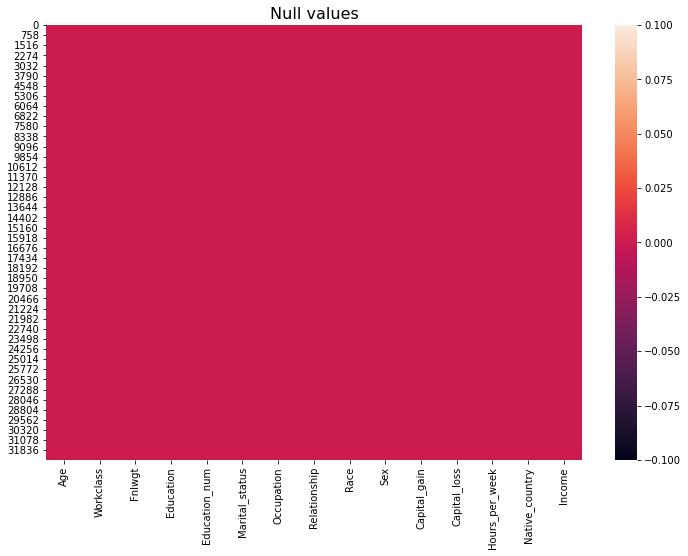

In [7]:
plt.figure(figsize=(12,8))
plt.title('Null values',fontsize=16)
sns.heatmap(df.isnull());

it is clear that there is no null value present in dataset

In [8]:
# stats summary
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There is no missing value present in the numerical columns as count of each column is 32560
.
minimum Age of a person who earns monney is 17 and maximun age is 90 and average age is 38.

Maybe the fnlwgt is the sampling weight,fnlwgt is not related to the target variable 'income' and will be removed before building the model.

Education column is containing number of years of education in total.

Capital gain and capital loss is maybe outcome( profit or loss ) of investment of a person other than his salary. Both the 

columns are skewed as the standard deviation is very much bigger than mean value. We need to take care of that. And

Hours per week is showing how much time one person is spending for work per week. and it's showing minimum 1 hour to maximum 99 

hours people do work and average time hour per week is 40 hours. The difference between min and max is big so we need to check the skewness.

The values are on different scales.Hence, we will use StandardScaler from the sklearn library to scale the features.

In [9]:
# checking zero count 
df[df['Capital_gain']==0].count()

Age               29849
Workclass         29849
Fnlwgt            29849
Education         29849
Education_num     29849
Marital_status    29849
Occupation        29849
Relationship      29849
Race              29849
Sex               29849
Capital_gain      29849
Capital_loss      29849
Hours_per_week    29849
Native_country    29849
Income            29849
dtype: int64

Capital_gain conatain 91.67% of zero values.

In [10]:
# checking Zero count
df[df['Capital_loss']==0].count()

Age               31041
Workclass         31041
Fnlwgt            31041
Education         31041
Education_num     31041
Marital_status    31041
Occupation        31041
Relationship      31041
Race              31041
Sex               31041
Capital_gain      31041
Capital_loss      31041
Hours_per_week    31041
Native_country    31041
Income            31041
dtype: int64

95.33% of Captial_loss values are zero.

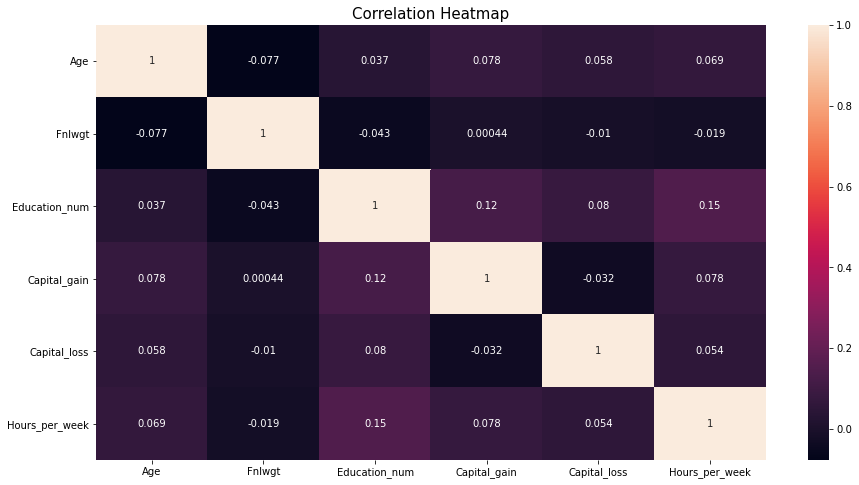

In [11]:
## correlation Plot
plt.figure(figsize=(15,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True);

The sample weight i.e. 'fnlwgt' is negatively related with other variables.

The numeric variables are not strongly correlated.

Neither the strong positive nor the strong negative correlation present in any variable.

There is a postive (>.1) correlation between Education_num and captial_gain

# Segregation of Object and Numeric DataType for Analyis

In [12]:
# for numeric columns
num_df = df.select_dtypes(exclude='object')

# for categorical columns
obj_df = df.select_dtypes(include='object')

In [13]:
num_df

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [14]:
obj_df

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


# categorical attributes

In [15]:
for col in obj_df:
    print('............',col,'............')
    print(obj_df[col].value_counts())

............ Workclass ............
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
............ Education ............
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
............ Marital_status ............
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse      

 Workclass,Occupation and Native Country contains a "?", we will replace with mode values.

In [16]:
# replacing '?' np.nan
df= df.replace(' ?',np.nan)

In [17]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

now workclass has 1836 null values occupation 1843 and Native country has 583 null values

# filling null values

In [18]:
df['Workclass']= df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation']= df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country']= df['Native_country'].fillna(df['Native_country'].mode()[0])

In [19]:
df_1 = df.copy()

# Feature Engineering:

In [20]:
df_1['Workclass']=df_1['Workclass'].replace([' Without-pay',' Never-worked'],'unemployed')
df_1['Workclass']=df_1['Workclass'].replace([' State-gov',' Local-gov',' Federal-gov'],'government')
df_1['Workclass']=df_1['Workclass'].replace([' Self-emp-not-inc',' Self-emp-inc'],'self_employed')

In [21]:
df_1['Workclass'].value_counts()

 Private         24532
government        4350
self_employed     3657
unemployed          21
Name: Workclass, dtype: int64

In [22]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [23]:
df_1['Education'].replace(' Preschool','dropout',inplace=True)
df_1['Education'].replace(' 10th','dropout',inplace=True)
df_1['Education'].replace(' 11th','dropout',inplace=True)
df_1['Education'].replace(' 12th','dropout',inplace=True)
df_1['Education'].replace(' 1st-4th','dropout',inplace=True)
df_1['Education'].replace(' 5th-6th','dropout',inplace=True)
df_1['Education'].replace(' 7th-8th','dropout',inplace=True)
df_1['Education'].replace(' 9th','dropout',inplace=True)
df_1['Education'].replace(' HS-Grad','HighGrad',inplace=True)
df_1['Education'].replace(' HS-grad','HighGrad',inplace=True)
df_1['Education'].replace(' Some-college','CommunityCollege',inplace=True)
df_1['Education'].replace(' Assoc-acdm','CommunityCollege',inplace=True)
df_1['Education'].replace(' Assoc-voc','CommunityCollege',inplace=True)
df_1['Education'].replace(' Bachelors','Bachelors',inplace=True)
df_1['Education'].replace(' Masters','Masters',inplace=True)
df_1['Education'].replace(' Prof-school','Masters',inplace=True)
df_1['Education'].replace(' Doctorate','Doctorate',inplace=True)

In [24]:
df_1['Education'].value_counts()

HighGrad            10501
CommunityCollege     9740
Bachelors            5354
dropout              4253
Masters              2299
Doctorate             413
Name: Education, dtype: int64

In [25]:
df_1['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [26]:
df_1['Marital_status']=df_1['Marital_status'].replace([' Married-civ-spouse',' Married-AF-spouse'],'married')
df_1['Marital_status']=df_1['Marital_status'].replace([' Separated',' Widowed',' Divorced',' Married-spouse-absent'],'once_married')
df_1['Marital_status']=df_1['Marital_status'].replace(' Never-married','never_married')

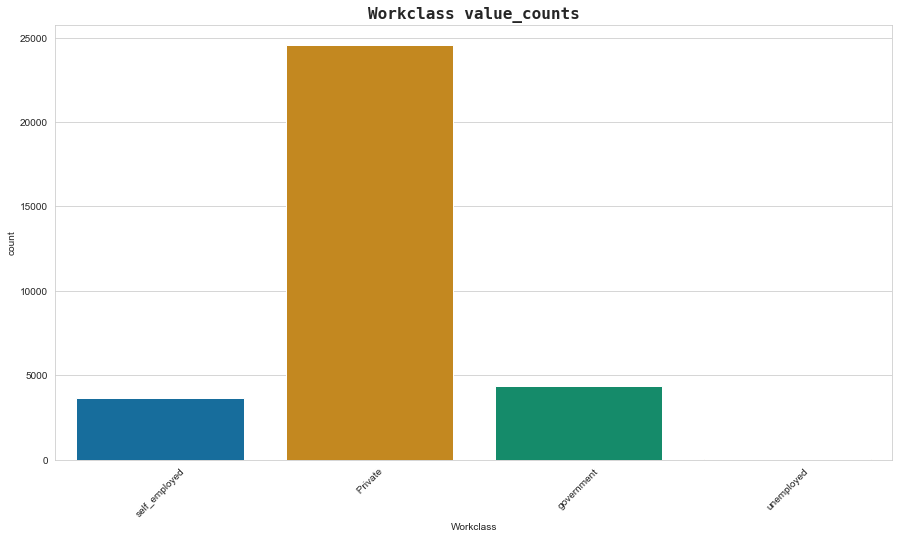

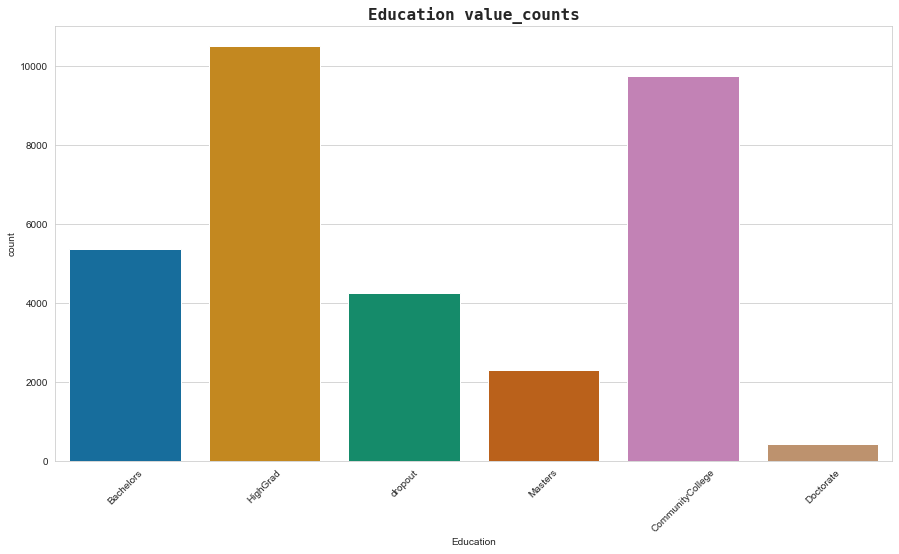

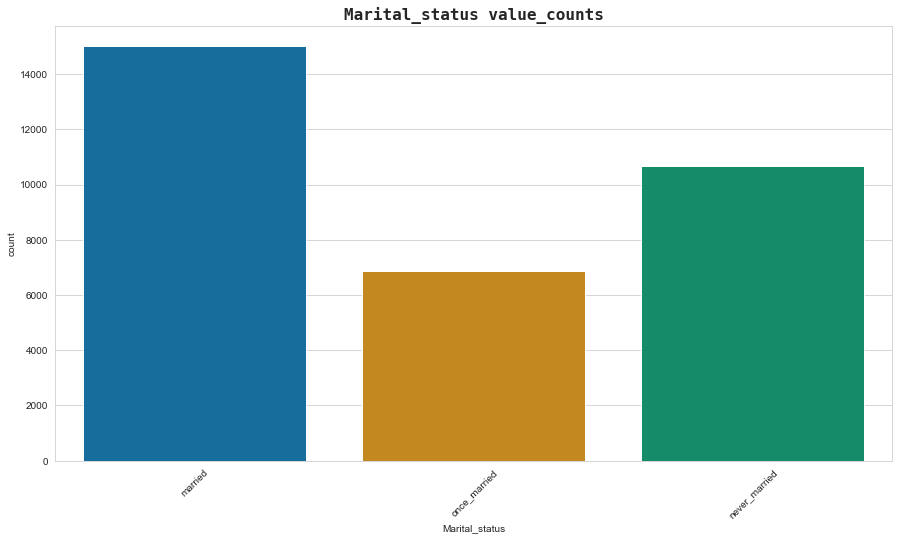

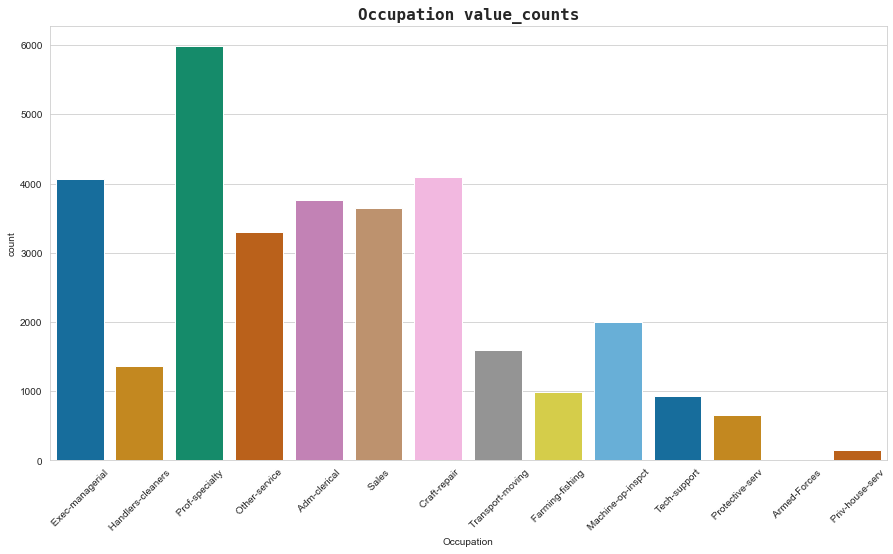

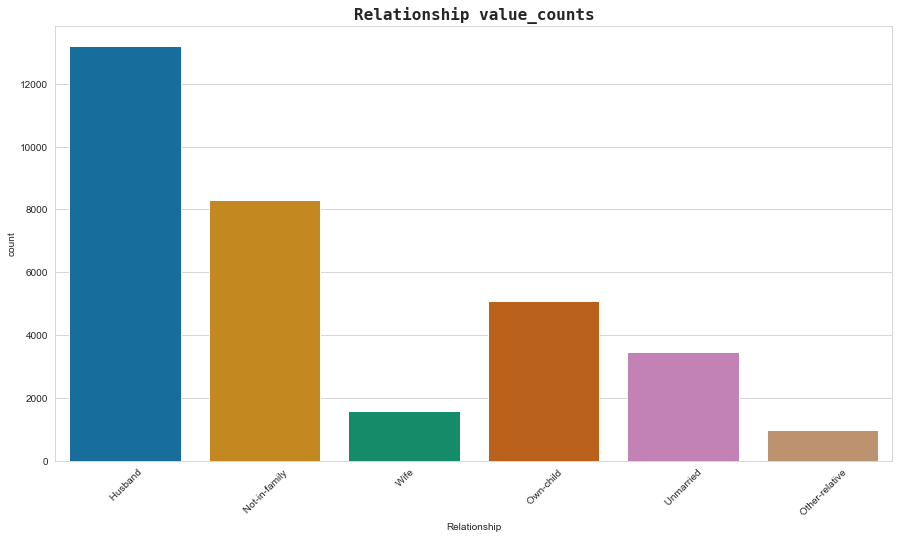

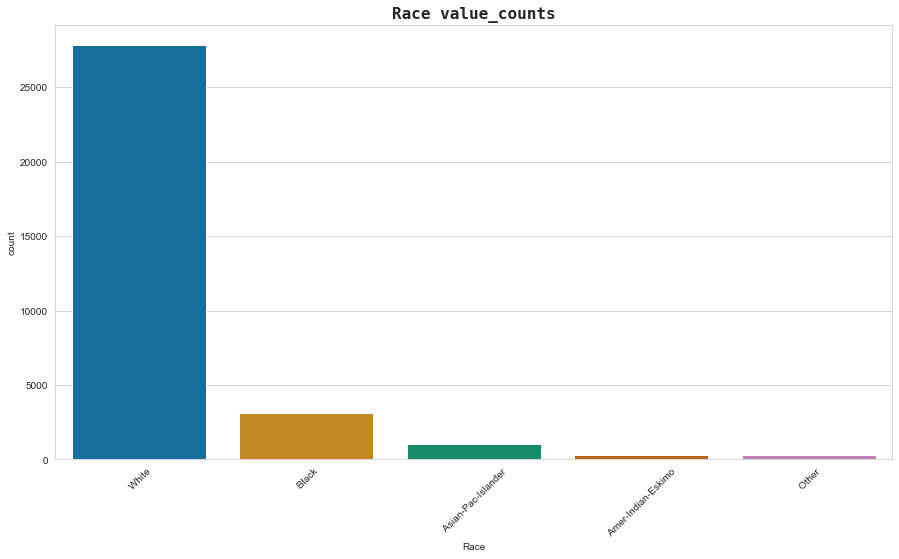

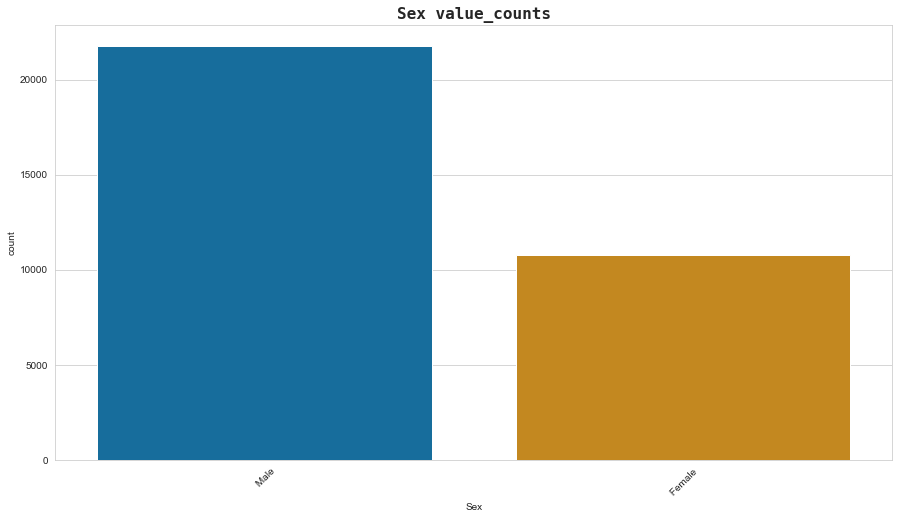

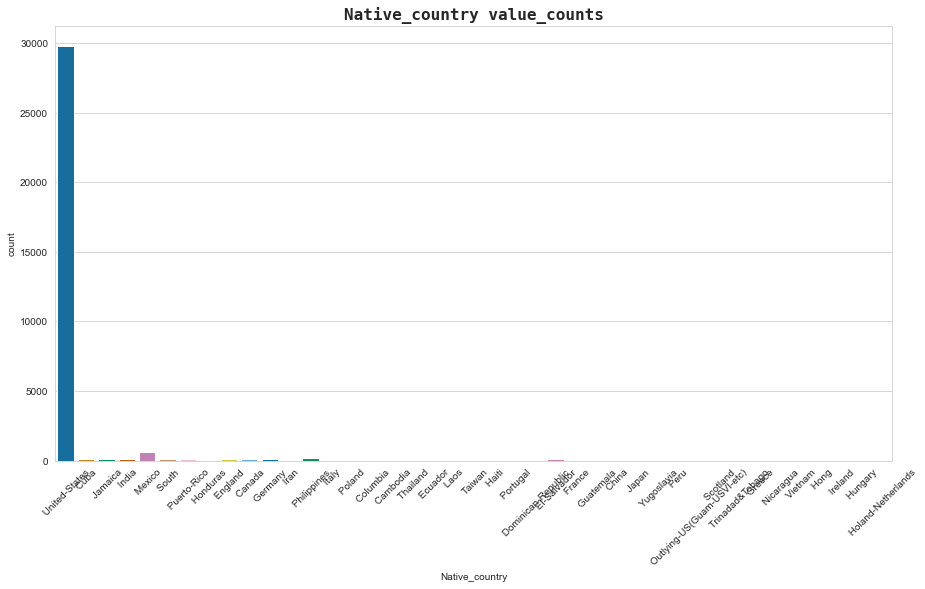

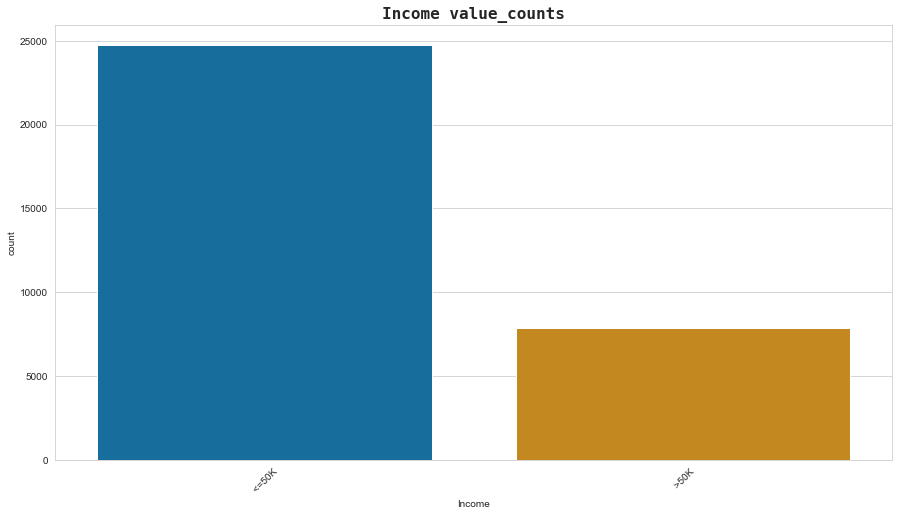

In [27]:
obj = df_1.select_dtypes(include='object')
for col in obj:
    sns.set_style('whitegrid')
    plt.figure(figsize=(15,8))
    plt.title(col+' value_counts',fontsize=16,fontname='Monospace',fontweight='bold')
    plt.xticks(rotation=45)
    x= sns.countplot(df_1[col],palette='colorblind',data=df_1)
    plt.show();

workclass - The count of individuals working in a private sector is high as compared to other sectors.

education - The count of individuals having HS-grad are more follwed by the individuals having community-college, followed by bachelor people.

marital-status - The individual who married are more followed by the individuals who not-married. The count of once married inviduals is above 6000.

occupation - The count of individuals working as a Prof-specialty id higest in the data followed by individuals working as a Craft-repair > Exec-managerial > Adm-clerical > Sales > Other-service.

relationship - The count of individuals as husband is approx. 13200 followed by individuals not-in-family as compared to other individual's relationship.

race - The count of white individuals is high.

sex - The count of females is alost half of the count of males.

native-country - The majority of individuals belongs to United-States.

income - The no. of individuals have income of more than or equal to 50k.

# Creating a barplot for 'Years of Education'

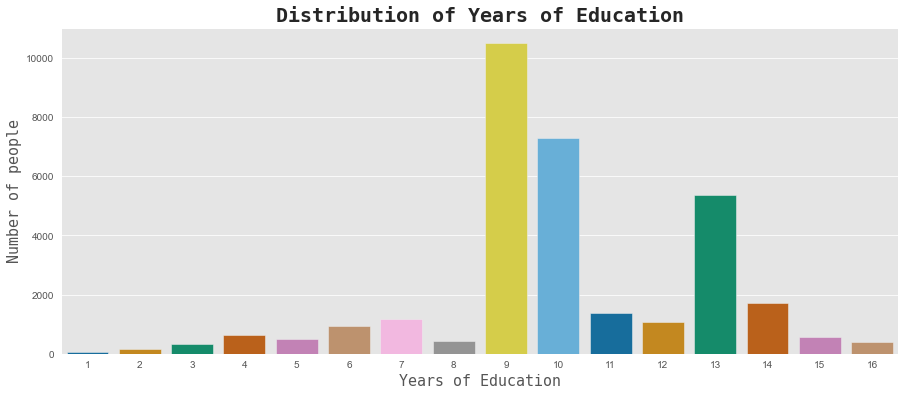

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 6))
sns.countplot(df_1['Education_num'], palette='colorblind',data=df_1)
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15});

 Mostly people have done 9 years of education followed by 10 years then 13 & 14 years.

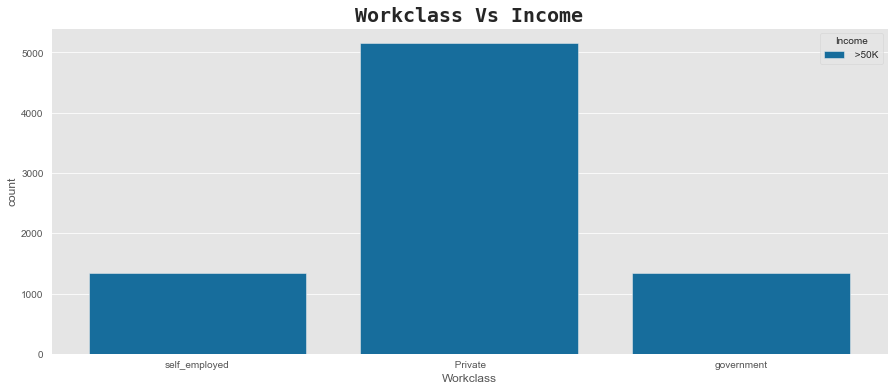

In [29]:
plt.figure(figsize=(15,6))
plt.title('Workclass Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Workclass", hue ="Income",palette='colorblind' ,data = df_1[df_1['Income']==' >50K'])
plt.plot();

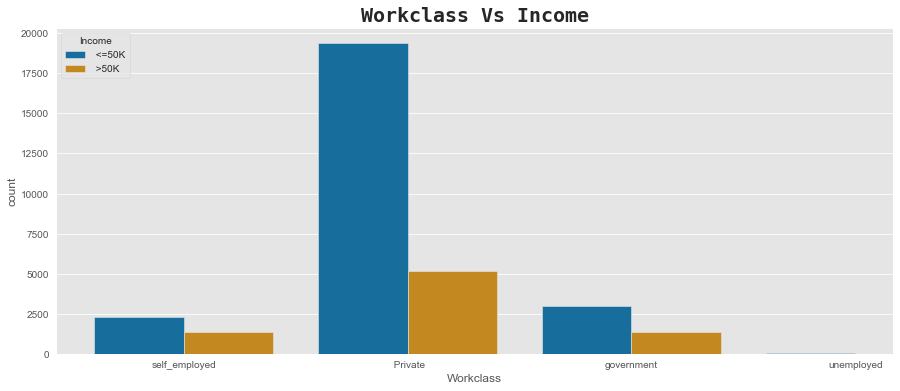

In [30]:
plt.figure(figsize=(15,6))
plt.title('Workclass Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Workclass", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

We can see that people who are in private job ears more than 50k followed by self_employed and Government job.

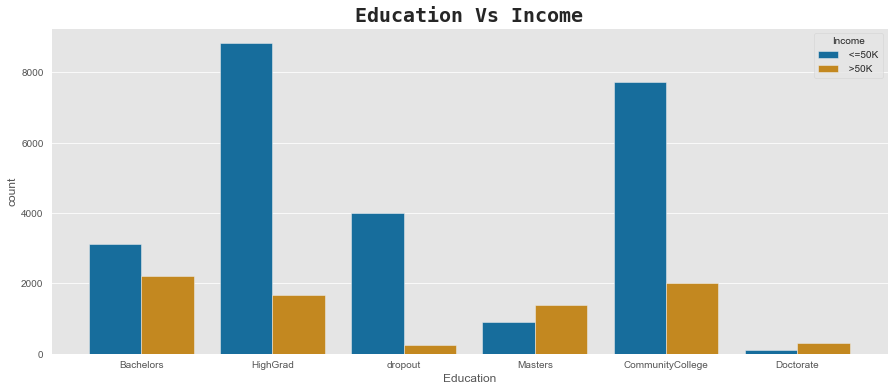

In [31]:
plt.figure(figsize=(15,6))
plt.title('Education Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Education", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();


 People who have gone for Bachleors are earning more than 50k.Additionally, people who gone for masters and Doctorate ears very well which is more than 50k

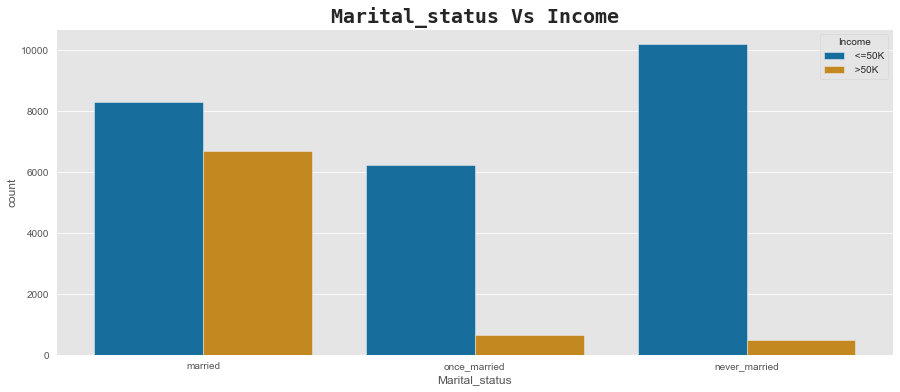

In [32]:
plt.figure(figsize=(15,6))
plt.title('Marital_status Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Marital_status", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

married people earned mostly more than 50k whereas People who divorced,Seperated or widows generally ears less than 50k.

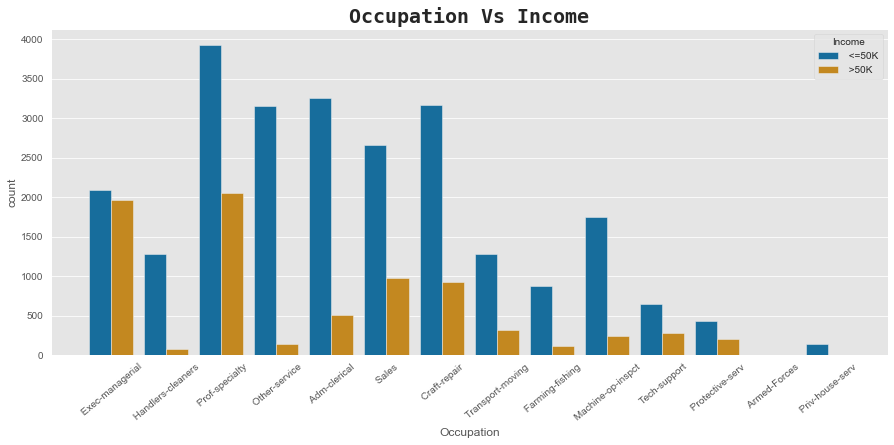

In [33]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=40)
plt.title('Occupation Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Occupation", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

We can see that people who had been in Managerial Position ears mostly above 50k.

As well, People who have some teaching career like professor are also earning 50k as comapired to other occupation.

Sales and carft repair occupation also earns more than 50k.

farming-fishing,Armed Forces and Private house service occpationalist generally not earns more than 50k.

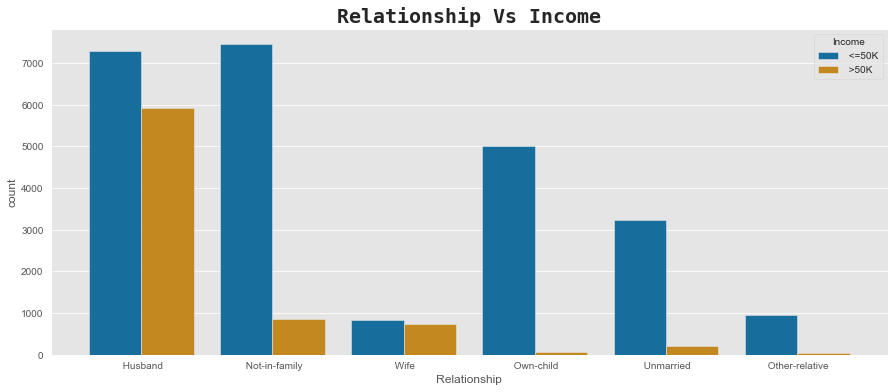

In [34]:
plt.figure(figsize=(15,6))
plt.title('Relationship Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Relationship", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

Husbands are earling more than 50k compaired to wife. But in ratios, wife have good numbers in figure to earn more than 50k.'

People who are single or Unmarried earns majorly below 50k.

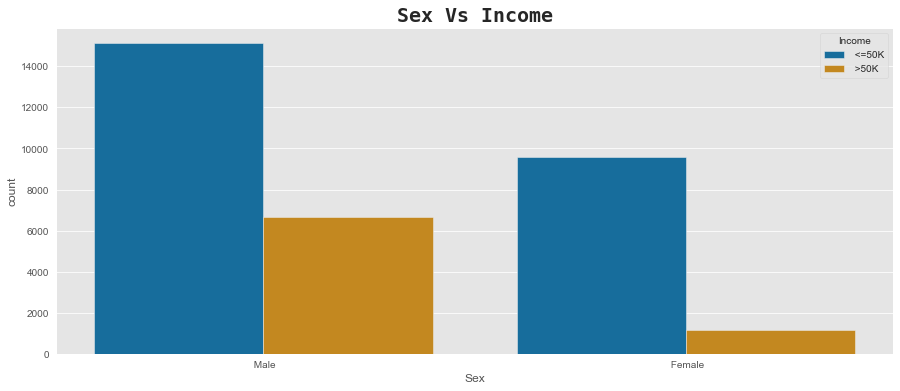

In [35]:
plt.figure(figsize=(15,6))
plt.title('Sex Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Sex", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

Males earned more than 50k as compared to Female.

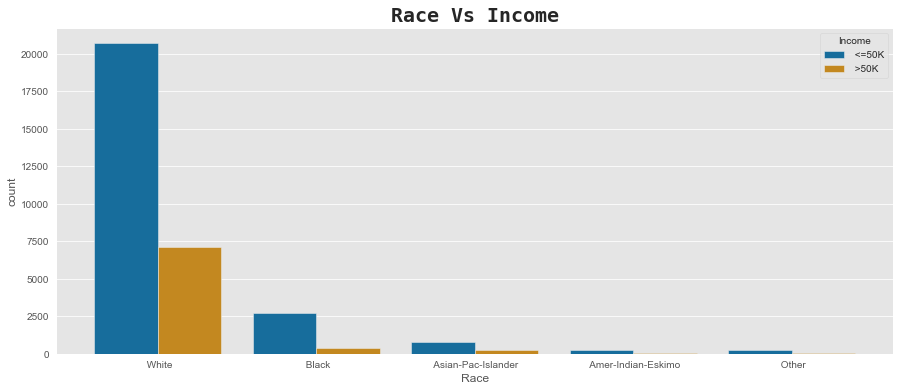

In [36]:
plt.figure(figsize=(15,6))
plt.title('Race Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Race", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();


White people are the highest earnes. Approx 7000 of white people earns more than 50k.

For, black people majority of than earns less than 50k.

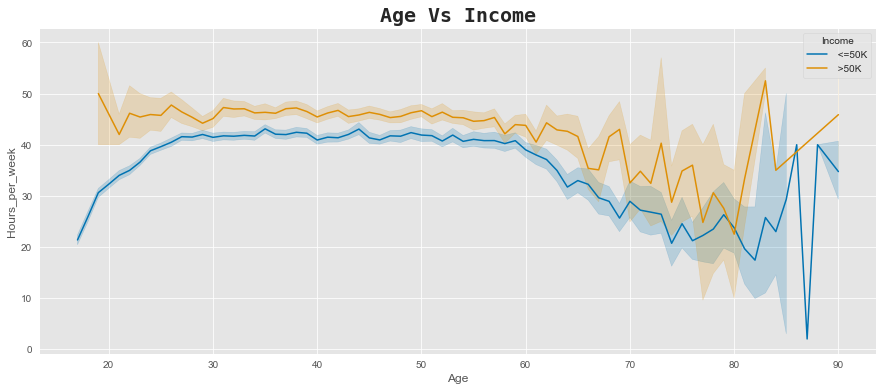

In [37]:
plt.figure(figsize=(15,6))
plt.title('Age Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.lineplot(x ="Age", y='Hours_per_week',hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

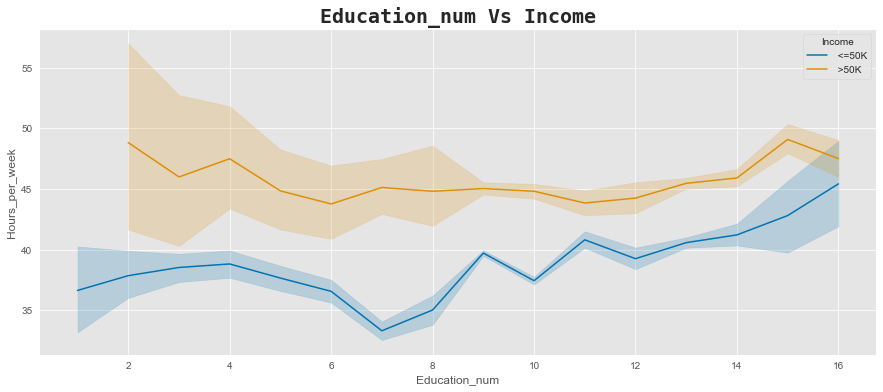

In [38]:
plt.figure(figsize=(15,6))
plt.title('Education_num Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.lineplot(x ='Education_num', y='Hours_per_week',hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

 people who earns more than 50k, work more than 43hr a week whereas people who earn less than 50k works below 40hr in week.

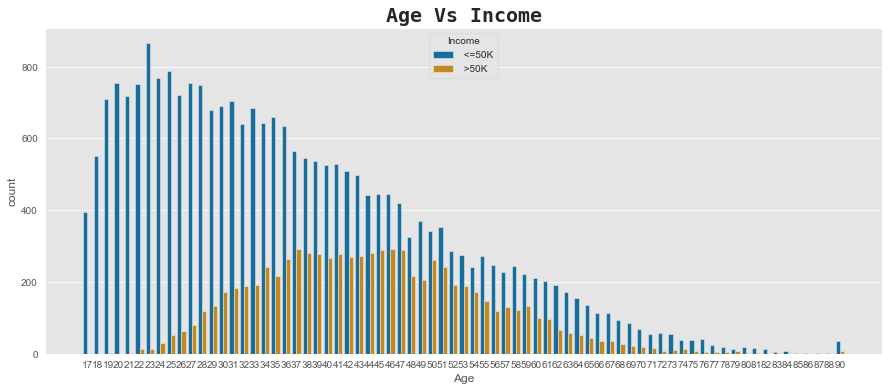

In [39]:
plt.figure(figsize=(15,6))
plt.title('Age Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Age", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot();

people who earned more than 50k has a age group of 31-55(mostly).

We can observe that people who has the age group of 17-31 generally earns less than 50k.

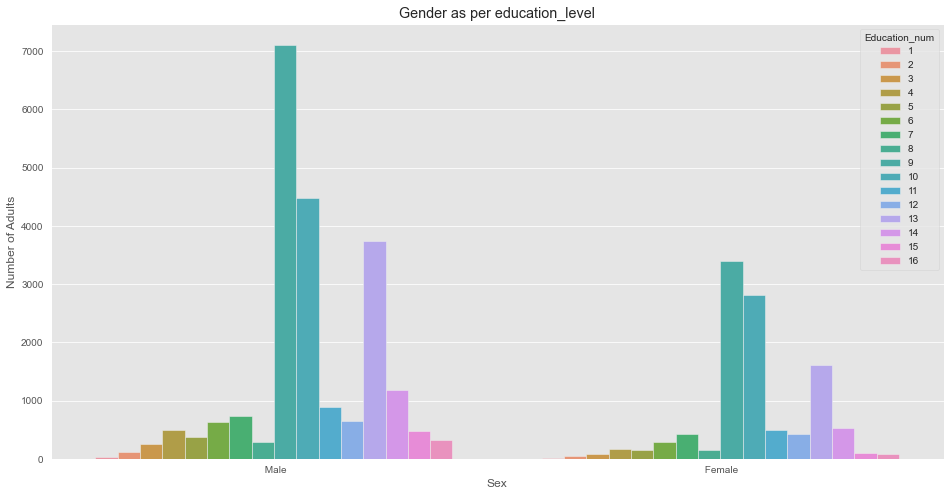

In [40]:
plt.figure(figsize=(16,8))
sns.countplot(x="Sex",hue="Education_num", data = df_1)
plt.ylabel('Number of Adults')
plt.title('Gender as per education_level');


Very few females have education level ≥ 14 in the dataset where the majority of adults earn more than 50k dollars annually, this explains a bit why very few females earn more than 50k dollars annually

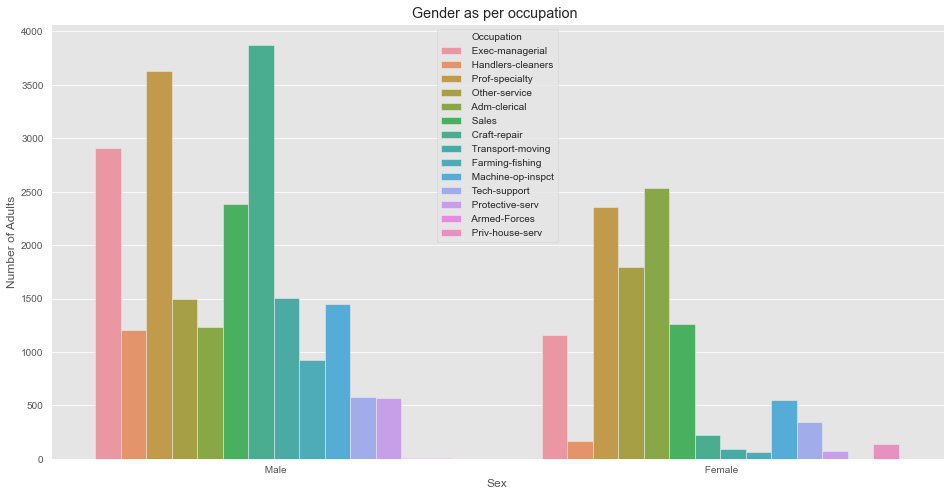

In [41]:
plt.figure(figsize=(16,8))
sns.countplot(x="Sex",hue="Occupation", data = df_1)
plt.ylabel('Number of Adults')
plt.title('Gender as per occupation ');

Representation of females is very high in Adm-clerical jobs which is a relatively low income occupation, also female representation is very low in craft repair occupation which is a relatively higher income occupation, this also explains a bit why males earn higher

# checking the data distribution

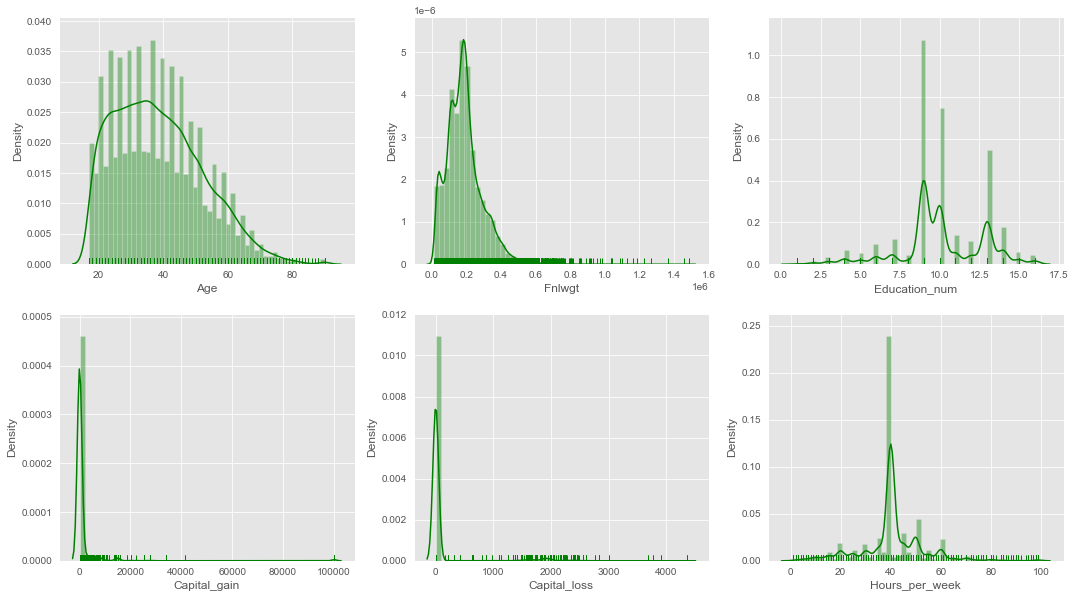

In [42]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.distplot(df_1[col],color='green', rug=True)
        plt.xlabel(col)
        plot=plot+1
plt.show();

1-Age and Fnlwgt are right skewed.

2-Education_num has variation, which need treatment.

3-captital_gain & Capital_loss are highly right skewed with majority values are zero.

4- Although Hours_per_week seems Normal Distributed but it shows some variation in so, we need to treat.

# Outliers Detection

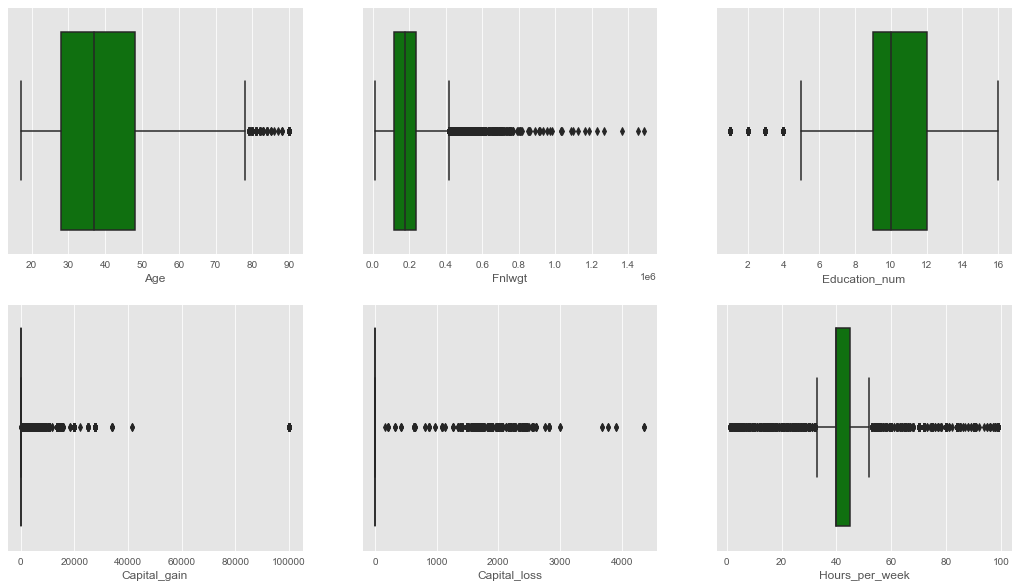

In [43]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df_1[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show();

the numerical data are having outliers that we need to take care.

In [44]:
def outlier_IQR(data,col):
    IQR=data[col].quantile(.75)-data[col].quantile(.25)
    lower_bridge=data[col].quantile(.25)-(IQR*1.5)
    upper_bridge=data[col].quantile(.75)+(IQR*1.5)
    non_outlier=np.where((data[col]<lower_bridge )|(data[col]>upper_bridge),data[col].median(),data[col])
    data[col]=non_outlier
    sns.boxplot(data[col])

In [45]:
df_1.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

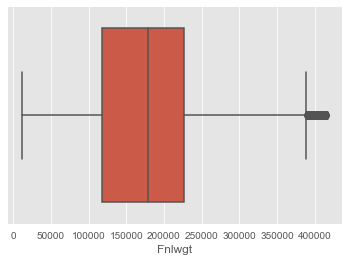

In [46]:
outlier_IQR(df_1,'Fnlwgt')

# when data is normally distributed.


In [47]:
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

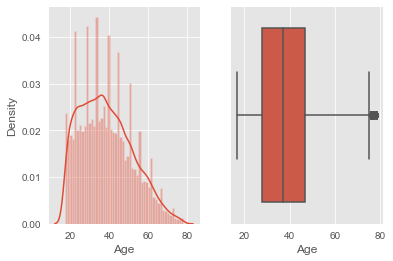

In [48]:
replace_outlier(df_1,'Age')

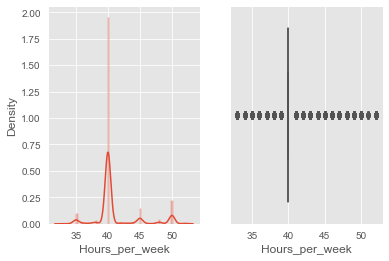

In [49]:
replace_outlier(df_1,'Hours_per_week')

# Again Checking Distribution

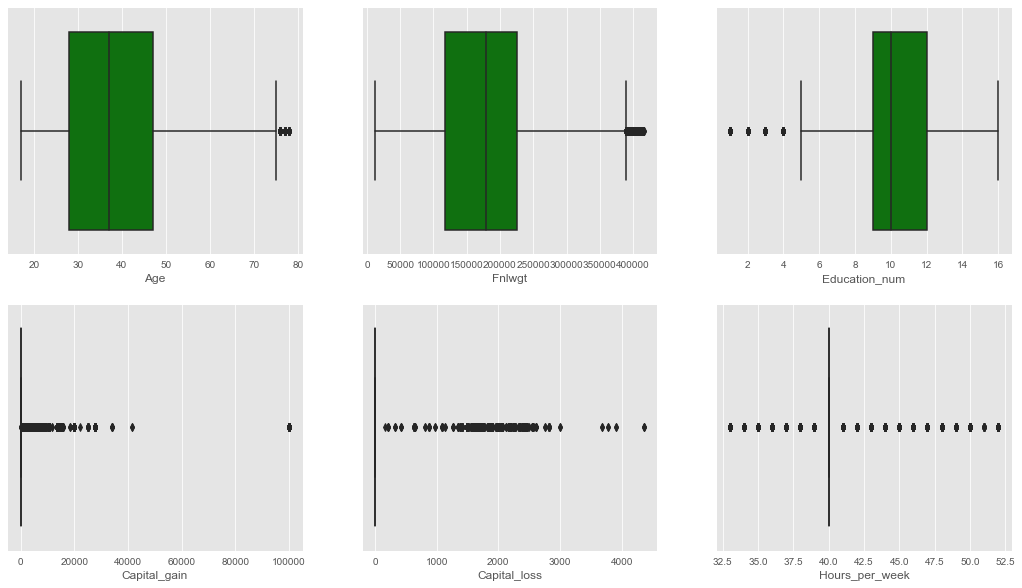

In [50]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df_1[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show();

1-Outliers has been removed.

2- We didnot remove outliers of capital_gain & capital_loss because it contains more than 90% values of Zero. we will drop it further.

In [51]:
# droping both columns
df_1=df_1.drop(['Capital_gain','Capital_loss'],axis=1)

# Skewness`

In [52]:
df_1.skew()

Age               0.470101
Fnlwgt            0.419158
Education_num    -0.311630
Hours_per_week    1.483592
dtype: float64

In [53]:
df_2=df_1.copy()
df_2['Hours_per_week']=np.log1p(df_2['Hours_per_week'])
df_2.skew()

Age               0.470101
Fnlwgt            0.419158
Education_num    -0.311630
Hours_per_week    1.254175
dtype: float64

skewness has been reduced to it's possible extent.

# Label encoding

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in obj:
    df_2[col]=le.fit_transform(df_2[col])

In [55]:
df_2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50.0,2,83311.0,0,13,0,3,0,4,1,3.713572,38,0
1,38.0,0,215646.0,3,9,2,5,1,4,1,3.713572,38,0
2,53.0,0,234721.0,5,7,0,5,0,2,1,3.713572,38,0
3,28.0,0,338409.0,0,13,0,9,5,2,0,3.713572,4,0
4,37.0,0,284582.0,4,14,0,3,5,4,0,3.713572,38,0


# Splitting Data into Input and Output Variable

In [56]:
x=df_2.drop(['Income'],axis=1)
y=df_2[['Income']]

# Feature scaling

In [57]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.873962,2.420574,-1.119241,-1.359288,1.134779,-0.961272,-0.790156,-0.900177,0.393675,0.703087,-0.305933,0.261374
1,-0.028233,-0.531644,0.419057,0.471337,-0.420027,1.600021,-0.286703,-0.277810,0.393675,0.703087,-0.305933,0.261374
2,1.099511,-0.531644,0.640790,1.691754,-1.197429,-0.961272,-0.286703,-0.900177,-1.962583,0.703087,-0.305933,0.261374
3,-0.780062,-0.531644,1.846088,-1.359288,1.134779,-0.961272,0.720204,2.211658,-1.962583,-1.422298,-0.305933,-5.352855
4,-0.103416,-0.531644,1.220388,1.081545,1.523480,-0.961272,-0.790156,2.211658,0.393675,-1.422298,-0.305933,0.261374
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.855245,-0.531644,0.903278,-0.749079,0.746077,-0.961272,1.475385,2.211658,0.393675,-1.422298,-0.942050,0.261374
32556,0.122133,-0.531644,-0.293186,0.471337,-0.420027,-0.961272,-0.034976,-0.900177,0.393675,0.703087,-0.305933,0.261374
32557,1.475426,-0.531644,-0.321828,0.471337,-0.420027,1.600021,-1.545336,1.589291,0.393675,-1.422298,-0.305933,0.261374
32558,-1.231160,-0.531644,0.254504,0.471337,-0.420027,0.319375,-1.545336,0.966924,0.393675,0.703087,-0.305933,0.261374


# Feature Importance


In [58]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [59]:
print(extra.feature_importances_)

[0.20542784 0.0276228  0.24259183 0.04724047 0.0924071  0.11062852
 0.09290088 0.06566528 0.01764637 0.02441866 0.05485525 0.01859501]


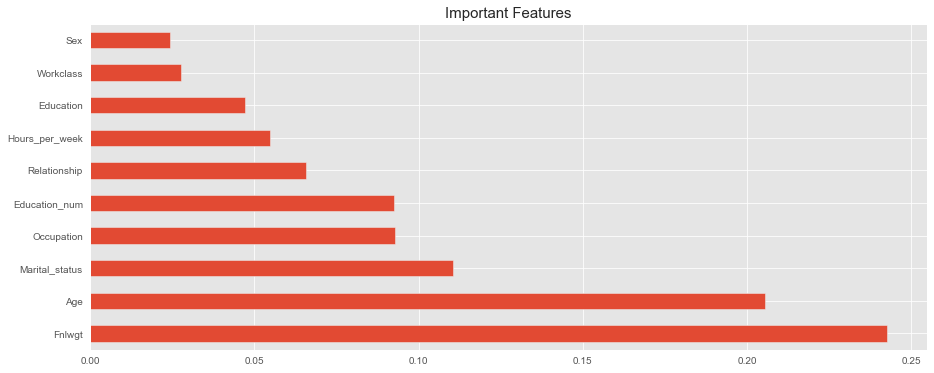

In [60]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show();

# time to create function for model building :)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE

In [72]:
def model_run(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        #x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

# Logistic Regression


max accuracy score corresponding to 85 is 82.89312039312038


cross validation score 81.62469287469287


Standard Deviation 0.36696012361778513


F1 score 54.72191116088092


Training accuracy 81.70300982800983


Test Accuracy 81.37285012285012


Confusion Matrix [[4566  378]
 [ 835  733]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4944
           1       0.66      0.47      0.55      1568

    accuracy                           0.81      6512
   macro avg       0.75      0.70      0.71      6512
weighted avg       0.80      0.81      0.80      6512



Roc_auc Score 0.6955090895581534





85

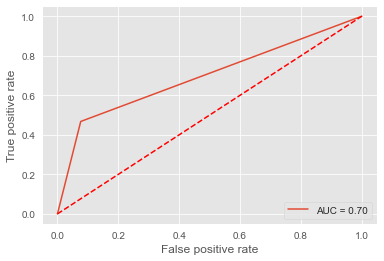

In [73]:
lg=LogisticRegression()
model_run(lg,x,y)

# Decision Tree


max accuracy score corresponding to 42 is 77.93304668304668


cross validation score 76.5909090909091


Standard Deviation 0.2810490243914855


F1 score 54.343122102009275


Training accuracy 99.96928746928747


Test Accuracy 77.31879606879608


Confusion Matrix [[4156  788]
 [ 689  879]]


Classification Report               precision    recall  f1-score   support

           0       0.86      0.84      0.85      4944
           1       0.53      0.56      0.54      1568

    accuracy                           0.77      6512
   macro avg       0.69      0.70      0.70      6512
weighted avg       0.78      0.77      0.78      6512



Roc_auc Score 0.7006008107126346





42

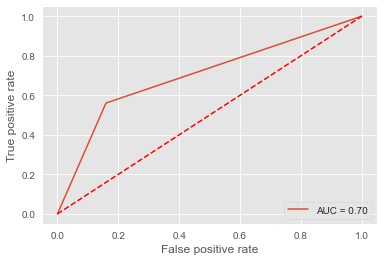

In [64]:
dt=DecisionTreeClassifier()
model_run(dt,x,y)

# KNN

max accuracy score corresponding to 95 is 82.23280098280098


cross validation score 80.92751842751844


Standard Deviation 0.3676534951264224


F1 score 58.36653386454182


Training accuracy 86.57862407862407


Test Accuracy 80.74324324324324


Confusion Matrix [[4379  565]
 [ 689  879]]


Classification Report               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4944
           1       0.61      0.56      0.58      1568

    accuracy                           0.81      6512
   macro avg       0.74      0.72      0.73      6512
weighted avg       0.80      0.81      0.80      6512



Roc_auc Score 0.7231533997093983





95

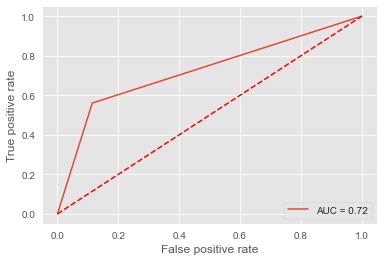

In [65]:
knn = KNeighborsClassifier()
model_run(knn,x,y)

# Naive Bayes

max accuracy score corresponding to 82 is 78.53194103194103


cross validation score 77.56756756756758


Standard Deviation 0.409341697335288


F1 score 58.523042754025546


Training accuracy 77.52994471744472


Test Accuracy 77.05773955773955


Confusion Matrix [[3964  980]
 [ 514 1054]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.80      0.84      4944
           1       0.52      0.67      0.59      1568

    accuracy                           0.77      6512
   macro avg       0.70      0.74      0.71      6512
weighted avg       0.80      0.77      0.78      6512



Roc_auc Score 0.7369869064130506





82

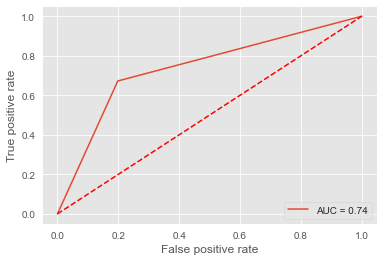

In [67]:
gnb =GaussianNB()
model_run(gnb,x,y)

# Random Forest

max accuracy score corresponding to 95 is 82.60135135135135


cross validation score 81.66461916461915


Standard Deviation 0.5807024078989259


F1 score 60.50420168067227


Training accuracy 99.9654484029484


Test Accuracy 81.95638820638821


Confusion Matrix [[4437  507]
 [ 668  900]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.90      0.88      4944
           1       0.64      0.57      0.61      1568

    accuracy                           0.82      6512
   macro avg       0.75      0.74      0.74      6512
weighted avg       0.81      0.82      0.82      6512



Roc_auc Score 0.7357155240737071





95

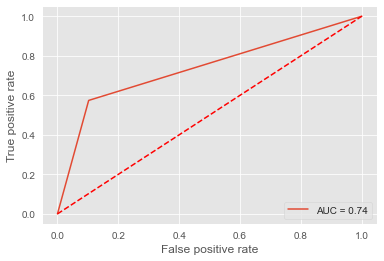

In [68]:
rf = RandomForestClassifier()
model_run(rf,x,y)

# AdaBoost

max accuracy score corresponding to 84 is 84.18304668304668


cross validation score 83.33230958230958


Standard Deviation 0.4289431272469015


F1 score 61.35401974612129


Training accuracy 83.46130221130221


Test Accuracy 83.16953316953317


Confusion Matrix [[4546  398]
 [ 698  870]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4944
           1       0.69      0.55      0.61      1568

    accuracy                           0.83      6512
   macro avg       0.78      0.74      0.75      6512
weighted avg       0.82      0.83      0.83      6512



Roc_auc Score 0.7371726603262664





84

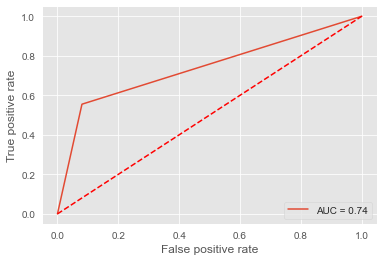

In [69]:
adb = AdaBoostClassifier()
model_run(adb,x,y)

# Gradient Boost

max accuracy score corresponding to 58 is 84.56695331695332


cross validation score 83.69471744471745


Standard Deviation 0.3665743505248941


F1 score 62.7696590118302


Training accuracy 84.11394348894349


Test Accuracy 83.56879606879608


Confusion Matrix [[4540  404]
 [ 666  902]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4944
           1       0.69      0.58      0.63      1568

    accuracy                           0.84      6512
   macro avg       0.78      0.75      0.76      6512
weighted avg       0.83      0.84      0.83      6512



Roc_auc Score 0.7467699458424146





58

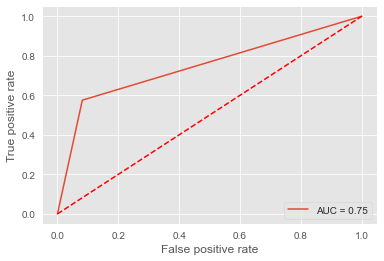

In [74]:
gb = GradientBoostingClassifier()
model_run(gb,x,y)

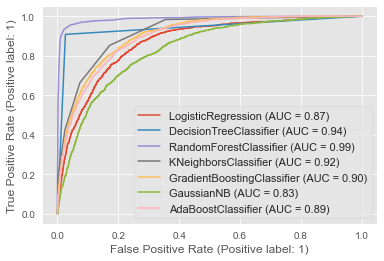

In [81]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(lg,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

our Adaboost model is most generalized model because the difference between accuracy score and Cross validation score is minimum. So we will select AdaBoost Classifier as our best model

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84,test_size=.20,stratify=y)

ada=AdaBoostClassifier()

param={'n_estimators': [100,200,300],'learning_rate':[.001,.01,.1,1,10],'algorithm':['SAMME', 'SAMME.R']}

grid=GridSearchCV(estimator=ada,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 300}

In [84]:
ada_final=AdaBoostClassifier(n_estimators=300,algorithm='SAMME.R',learning_rate=1)
ada_final.fit(x_train,y_train)
pred=ada_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test)*100)
print('\n')
print('Final f_1 score :',f1_score(pred,y_test)*100)
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test)*100)
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 84.3519656019656


Final f_1 score : 63.48978860623432


Final roc_auc score : 79.77506038157226


Final classification Report :               precision    recall  f1-score   support

           0       0.93      0.87      0.90      5289
           1       0.57      0.72      0.63      1223

    accuracy                           0.84      6512
   macro avg       0.75      0.80      0.77      6512
weighted avg       0.86      0.84      0.85      6512



Final confusion Matrix : [[4607  682]
 [ 337  886]]


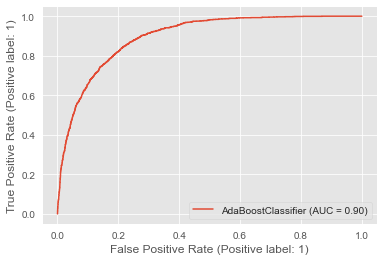

In [85]:
#check the ROC-AUC Curve of RFC after hyperparameter tuning:

disp = plot_roc_curve(ada_final,x_test,y_test)

our accuracy score has been improved from 84.18 to 84.35. Additionally our f_1 score also improved from 61.35 to 63.48

# saving model

In [86]:
import joblib
joblib.dump(ada_final,'Census_income_ada.pkl')

['Census_income_ada.pkl']

In [87]:
# Loading Model
loaded_model=joblib.load('Census_income_ada.pkl')
prediction=loaded_model.predict(x_test)

## :)  ##

Conclusion:
    

The given dataset conveys us so much information about Income of population of different countries. By doing the analysis we can say A higher number of popultion is earning <=50K annually while a few number of population is earning >50K. It gives us the insight of standard of living of the different popultion.

During analysis we have seen that there is no equal pay system in those various populations. as webhave seen most of the female professionals are Earning less than male professionals with same education or profession.

The male female ratio is also low.

It also provided that number of white people participation was most in comprision to the other races this also hints towards the social biasness towards a perticular race.

